1. Load the dataset

In [10]:
import pandas as pd

df = pd.read_excel("student_performance_1000.xlsx")
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group D,some college,standard,completed,89,34,65
1,male,group A,bachelor's degree,free/reduced,none,78,55,57
2,male,group A,some college,standard,completed,91,64,90
3,female,group D,bachelor's degree,standard,none,81,82,67
4,female,group C,some high school,standard,completed,60,81,50


In [19]:
df.shape

(1000, 10)

2. Data Analysis

In [11]:


df.info()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000
mean,65.509000,65.358000,64.424000
std,20.777623,20.450674,20.153769
min,30.000000,30.000000,30.000000
25%,48.000000,48.000000,47.000000
50%,66.000000,66.000000,65.000000
75%,85.000000,83.000000,82.000000
max,100.000000,100.000000,100.000000


2.1 Exploratory Data Analysis

In [20]:
import matplotlib.pyplot as plt

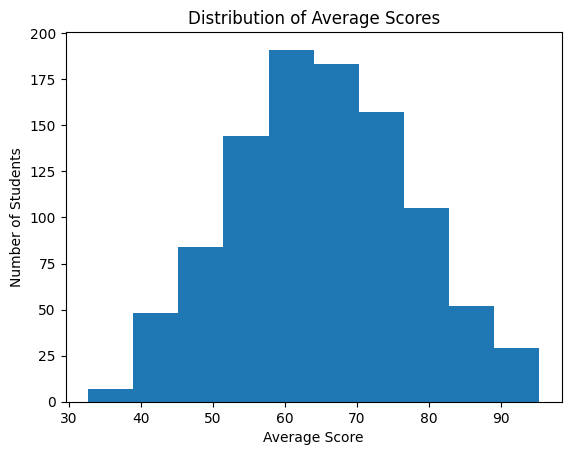

In [21]:
plt.figure()
plt.hist(df["average_score"], bins=10)
plt.title("Distribution of Average Scores")
plt.xlabel("Average Score")
plt.ylabel("Number of Students")
plt.show()



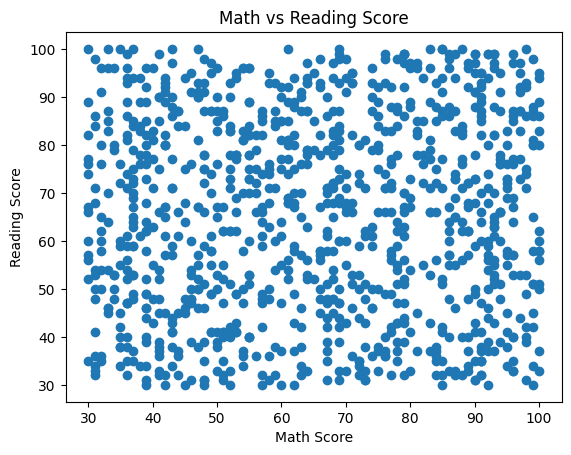

In [22]:
plt.figure()
plt.scatter(df["math_score"], df["reading_score"])
plt.title("Math vs Reading Score")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.show()

3. Idea Generation

In [12]:
df["average_score"] = (
    df["math_score"] +
    df["reading_score"] +
    df["writing_score"]
) / 3

df["performance"] = df["average_score"].apply(
    lambda x: 1 if x >= 50 else 0
)

df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,average_score,performance
0,female,group D,some college,standard,completed,89,34,65,62.666667,1
1,male,group A,bachelor's degree,free/reduced,none,78,55,57,63.333333,1
2,male,group A,some college,standard,completed,91,64,90,81.666667,1
3,female,group D,bachelor's degree,standard,none,81,82,67,76.666667,1
4,female,group C,some high school,standard,completed,60,81,50,63.666667,1


4. Data cleaning and Preparing

In [13]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

categorical_columns = [
    "gender",
    "race/ethnicity",
    "parental_level_of_education",
    "lunch",
    "test_preparation_course"
]

for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

5. Select ML Algorithm

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

6. Train the model

In [15]:


X = df.drop(["performance", "average_score"], axis=1)
y = df["performance"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

7. Test the model

In [16]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.965

8. Make Prediction

In [17]:
sample_student = [[
    1, 2, 3, 1, 0, 65, 60, 55
]]

result = model.predict(sample_student)

print("PASS" if result[0] == 1 else "FAIL")

PASS


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


9. Deployment preparation

In [18]:
import joblib
joblib.dump(model, "student_model.pkl")

['student_model.pkl']